# Clustering

Introdução à Análise de Clusters e Pré-processamento de Dados

Agrupamento de Clientes: Uma Abordagem Inteligente
Imagine organizar seus clientes em grupos que compartilham características similares - é exatamente isso que o clustering faz! Esta técnica nos permite descobrir padrões naturais em nossos dados, agrupando clientes com comportamentos e características semelhantes.

Por que isso é importante?
- Personalização de marketing
- Melhor entendimento do público
- Estratégias direcionadas para cada grupo
- Otimização de recursos

Preparando os Dados (Pré-processamento)
Antes de agrupar nossos clientes, precisamos preparar nossos dados cuidadosamente:

1. Limpeza
- Remoção de dados inconsistentes
- Tratamento de valores ausentes
- Correção de erros

2. Padronização
- Ajuste de escalas diferentes
- Normalização de valores
- Transformação de variáveis categóricas

3. Seleção de Características
- Escolha das variáveis mais relevantes
- Redução de dimensionalidade
- Eliminação de redundâncias

Por que o Pré-processamento é Crucial?
- Garante resultados confiáveis
- Evita distorções nos agrupamentos
- Melhora a qualidade das análises
- Permite comparações justas entre diferentes características

Este processo cuidadoso de preparação é como preparar o terreno antes de construir - fundamental para o sucesso do projeto!

Nas próximas seções, veremos como aplicar estas técnicas em nossos dados para descobrir insights valiosos sobre nossos clientes.

In [2]:
import os

os.environ["OMP_NUM_THREADS"] = "9"

In [3]:
import pandas as pd

DATA = "C:/Users/gabri/projetos_python/cluster_ifood/dados_modelo.csv"

df = pd.read_csv(DATA)

df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,YearsSinceEnrolled,Age,Agegroup,MntTotal,MntRegularProducts,Children,HasChildren,AceptedcmpTotal,HasAceptedCmp,NumTotalPurchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,57,46-60,1617,1529,0,0,0,0,22
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,60,46-60,27,21,2,1,0,0,4
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,0,49,46-60,776,734,0,0,0,0,20
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,0,30,18-30,53,48,1,1,0,0,6
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,0,33,31-45,422,407,1,1,0,0,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2229 non-null   object 
 1   Marital_Status       2229 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2229 non-null   int64  
 4   Teenhome             2229 non-null   int64  
 5   Recency              2229 non-null   int64  
 6   MntWines             2229 non-null   int64  
 7   MntFruits            2229 non-null   int64  
 8   MntMeatProducts      2229 non-null   int64  
 9   MntFishProducts      2229 non-null   int64  
 10  MntSweetProducts     2229 non-null   int64  
 11  MntGoldProds         2229 non-null   int64  
 12  NumDealsPurchases    2229 non-null   int64  
 13  NumWebPurchases      2229 non-null   int64  
 14  NumCatalogPurchases  2229 non-null   int64  
 15  NumStorePurchases    2229 non-null   i

- https://scikit-learn.org/stable/modules/preprocessing.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html

In [5]:
numerical_features = df.select_dtypes(include="number").columns
len(numerical_features)

32

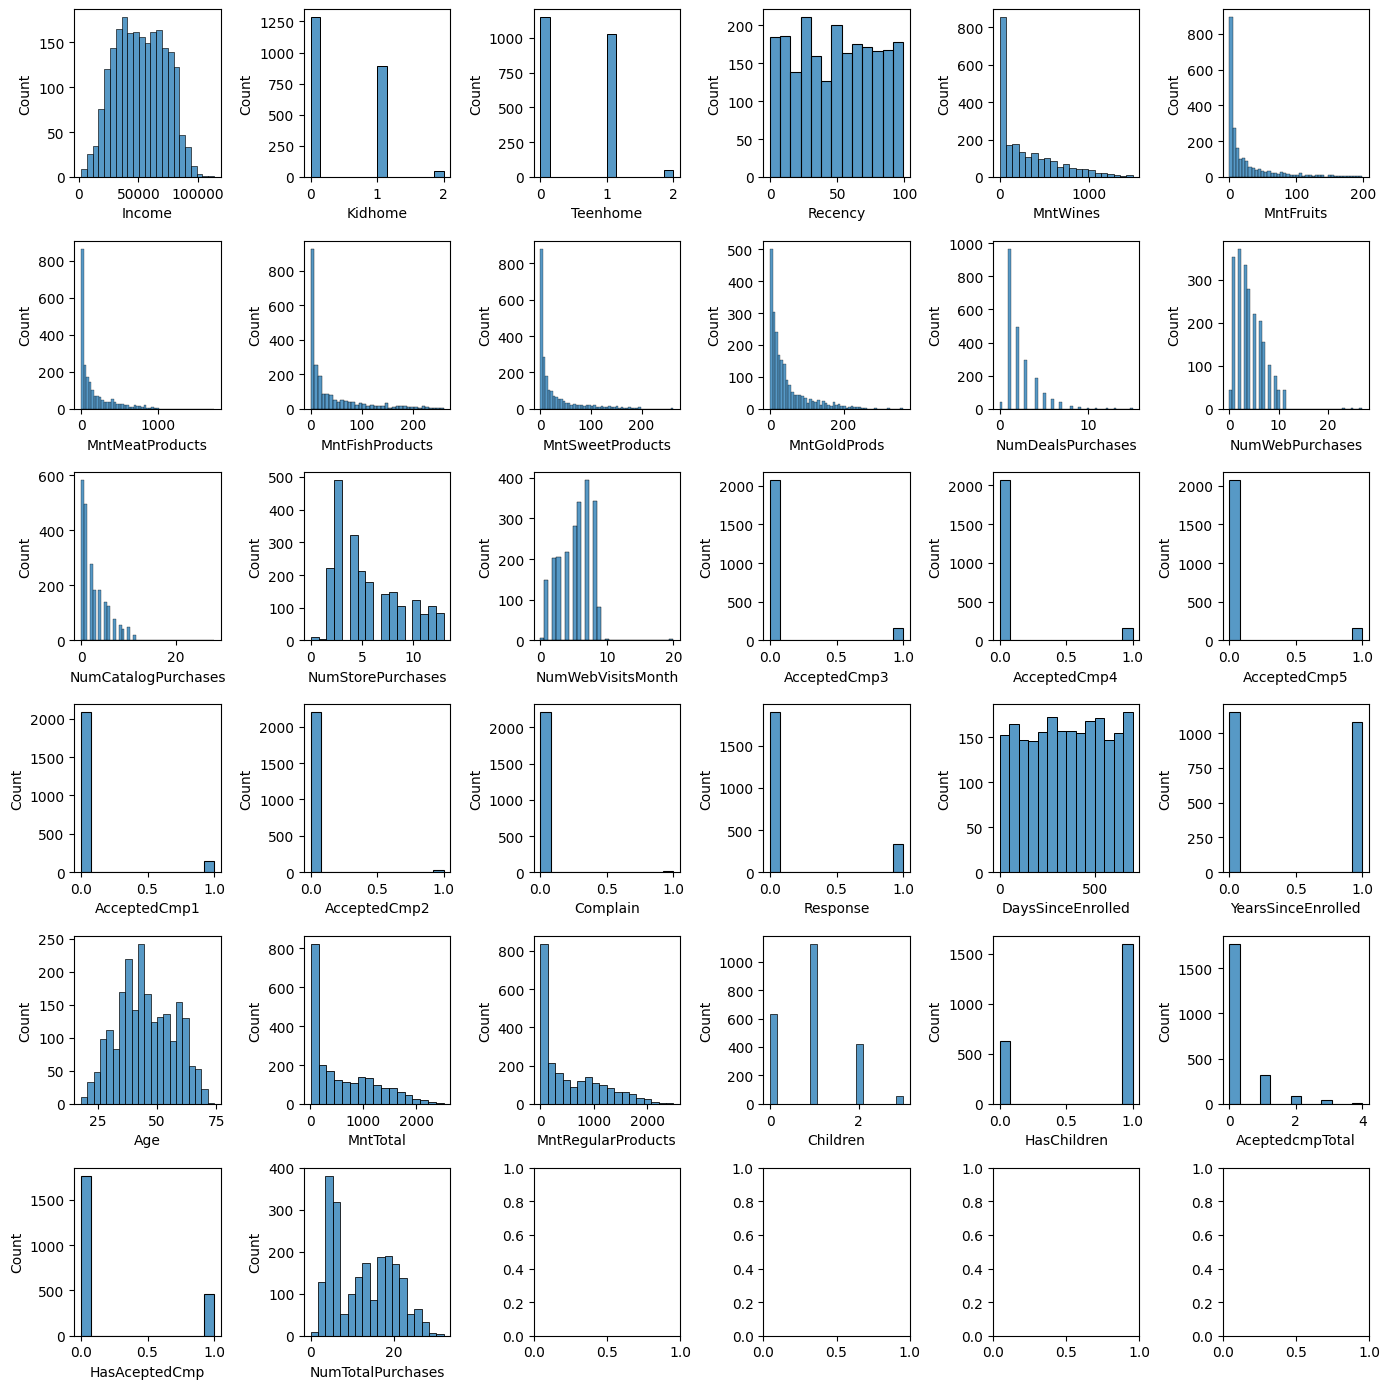

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(14, 14), tight_layout=True)

for ax, feature in zip(axs.flatten(), numerical_features):
    sns.histplot(x=feature, ax=ax, data=df)

plt.show()

In [7]:
# Ajuste de colunas para alinhamento ao DataFrame
one_hot_cols = [
    "Education",
    "Marital_Status",
    "Agegroup",  #
    "HasChildren",
    "HasAceptedCmp",  
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Complain",
    "Response",
    "Kidhome",
    "Teenhome",
    "YearsSinceEnrolled",
    "Children",
    "AceptedcmpTotal",  
]

standard_cols = [
    "Income",
    "Age",
]

# Seleção dinâmica para colunas começando com "Mnt" ou "Num"
power_cols = df.columns[
    df.columns.str.startswith("Mnt") | df.columns.str.startswith("Num")
].tolist()

# Colunas restantes para MinMaxScaler (excluindo as já atribuídas acima)
minmax_cols = [
    col for col in df.columns if col not in one_hot_cols + standard_cols + power_cols
]



In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

preprocessing.fit_transform(df)

array([[ 0.        ,  0.        ,  1.        , ...,  1.31712381,
         1.31243436,  1.22292708],
       [ 0.        ,  0.        ,  1.        , ..., -1.44606463,
        -1.45355261, -1.31505327],
       [ 0.        ,  0.        ,  1.        , ...,  0.66080601,
         0.69063209,  1.0274534 ],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.07063154,
         1.11111828,  0.81998726],
       [ 0.        ,  0.        ,  0.        , ...,  0.73063369,
         0.74144901,  1.12657675],
       [ 0.        ,  0.        ,  0.        , ..., -0.44498501,
        -0.42224107, -0.50509803]])

In [9]:
preprocessing.get_feature_names_out()

array(['one-hot__Education_2n Cycle', 'one-hot__Education_Basic',
       'one-hot__Education_Graduation', 'one-hot__Education_Master',
       'one-hot__Education_PhD', 'one-hot__Marital_Status_Partner',
       'one-hot__Marital_Status_Single', 'one-hot__Agegroup_18-30',
       'one-hot__Agegroup_31-45', 'one-hot__Agegroup_46-60',
       'one-hot__Agegroup_61+', 'one-hot__HasChildren_0',
       'one-hot__HasChildren_1', 'one-hot__HasAceptedCmp_0',
       'one-hot__HasAceptedCmp_1', 'one-hot__AcceptedCmp1_0',
       'one-hot__AcceptedCmp1_1', 'one-hot__AcceptedCmp2_0',
       'one-hot__AcceptedCmp2_1', 'one-hot__AcceptedCmp3_0',
       'one-hot__AcceptedCmp3_1', 'one-hot__AcceptedCmp4_0',
       'one-hot__AcceptedCmp4_1', 'one-hot__AcceptedCmp5_0',
       'one-hot__AcceptedCmp5_1', 'one-hot__Complain_0',
       'one-hot__Complain_1', 'one-hot__Response_0',
       'one-hot__Response_1', 'one-hot__Kidhome_0', 'one-hot__Kidhome_1',
       'one-hot__Kidhome_2', 'one-hot__Teenhome_0', 'one-ho

In [10]:
df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out()
)

df_scaled.head()

,one-hot__Education_2n Cycle,one-hot__Education_Basic,one-hot__Education_Graduation,one-hot__Education_Master,one-hot__Education_PhD,one-hot__Marital_Status_Partner,one-hot__Marital_Status_Single,one-hot__Agegroup_18-30,one-hot__Agegroup_31-45,one-hot__Agegroup_46-60,...,power__MntSweetProducts,power__MntGoldProds,power__NumDealsPurchases,power__NumWebPurchases,power__NumCatalogPurchases,power__NumStorePurchases,power__NumWebVisitsMonth,power__MntTotal,power__MntRegularProducts,power__NumTotalPurchases
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.386289,1.088321,0.751411,1.327200,1.748094,-0.422083,0.700405,1.317124,1.312434,1.222927
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.974044,-0.945343,0.160248,-1.378523,-0.379702,-1.460893,-0.108438,-1.446065,-1.453553,-1.315053
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.548371,0.444525,-0.833691,1.327200,0.155148,1.242021,-0.526863,0.660806,0.690632,1.027453
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.522614,-1.050524,0.160248,-0.719190,-1.338574,-0.422083,0.300115,-1.121509,-1.064674,-0.873407
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.695488,-0.348288,1.451079,0.524777,0.523425,0.278912,-0.108438,0.177603,0.241753,0.359886


In [11]:
scaled_columns_not_one_hot = df_scaled.columns[~df_scaled.columns.str.startswith("one")]
scaled_columns_not_one_hot

Index(['standard__Income', 'standard__Age', 'minmax__Recency',
       'minmax__DaysSinceEnrolled', 'power__MntWines', 'power__MntFruits',
       'power__MntMeatProducts', 'power__MntFishProducts',
       'power__MntSweetProducts', 'power__MntGoldProds',
       'power__NumDealsPurchases', 'power__NumWebPurchases',
       'power__NumCatalogPurchases', 'power__NumStorePurchases',
       'power__NumWebVisitsMonth', 'power__MntTotal',
       'power__MntRegularProducts', 'power__NumTotalPurchases'],
      dtype='object')

In [12]:
len(scaled_columns_not_one_hot)

18

Análise das Transformações nos Dados dos Clientes

Os gráficos apresentam a distribuição de diferentes variáveis após transformações estatísticas (padronização e potência), revelando insights interessantes sobre nossos clientes:

Características Gerais:
- Renda (standard_Income): Distribuição mais equilibrada, semelhante a uma curva normal
- Idade (standard_Age): Concentração na faixa média, com poucos extremos
- Tempo de cadastro (minmax_DaysSinceEnrolled): Distribuição mais uniforme após normalização

Padrões de Compra:
1. Produtos Específicos
- Vinhos (power_MntWines): Distribuição bimodal, sugerindo dois grupos distintos de consumidores
- Frutas (power_MntFruits): Alta concentração de compras menores
- Carnes (power_MntMeatProducts): Distribuição mais equilibrada
- Peixes (power_MntFishProducts): Predominância de compras de menor valor

2. Comportamento de Compra
- Compras pela web (power_NumWebPurchases): Padrão crescente moderado
- Compras em catálogo (power_NumCatalogPurchases): Forte concentração em valores menores
- Visitas ao site (power_NumWebVisitsMonth): Distribuição concentrada na faixa média

3. Valor Total (power_MntTotal)
- Mostra uma distribuição mais equilibrada após a transformação
- Permite identificar melhor os diferentes níveis de gasto dos clientes

Estas transformações nos ajudam a:
- Identificar padrões mais claros de comportamento
- Comparar diferentes aspectos do consumo de forma mais justa
- Preparar os dados para análises mais avançadas

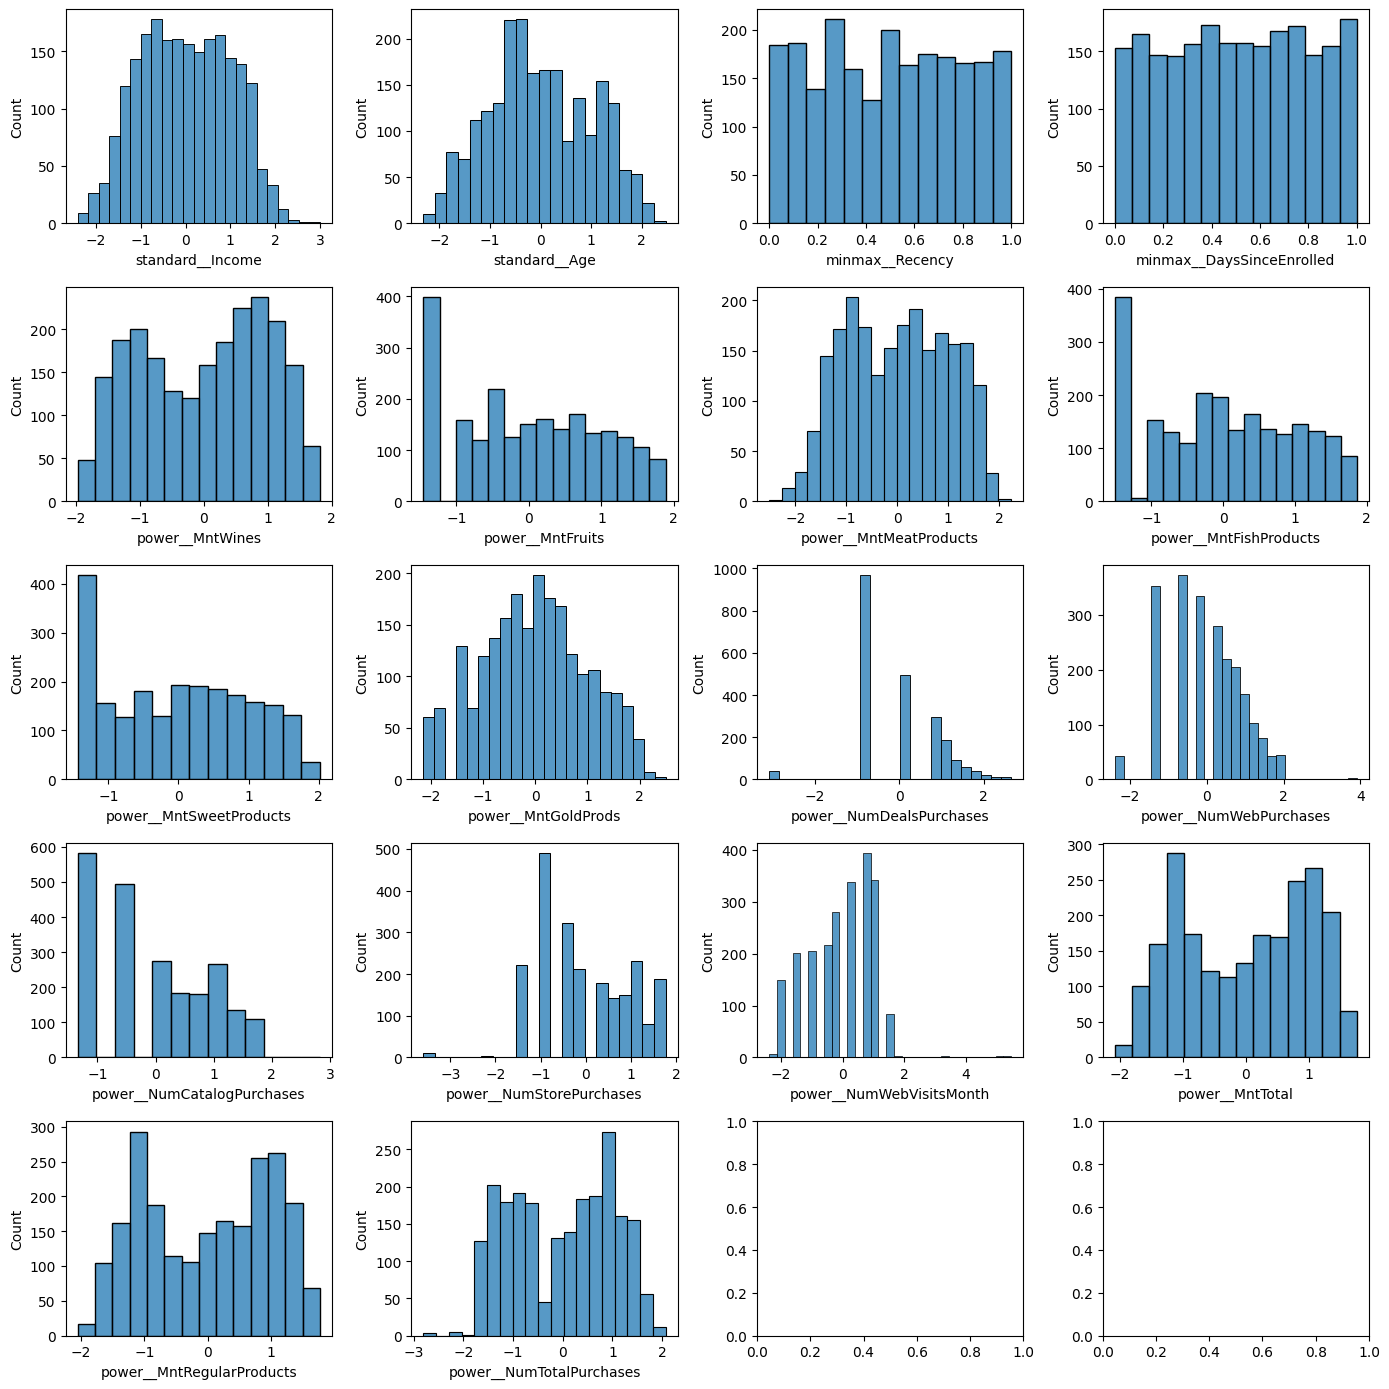

In [13]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(14, 14), tight_layout=True)

for ax, feature in zip(axs.flatten(), scaled_columns_not_one_hot):
    sns.histplot(x=feature, ax=ax, data=df_scaled)

plt.show()

Métodos de Avaliação para Clustering

Esta função nos ajuda a determinar o número ideal de grupos (clusters) para nossos clientes usando dois métodos complementares:

1. Método do Cotovelo (Elbow Method)
- Mostra a "inércia" (variação dentro dos grupos) para diferentes números de clusters
- Procuramos um "cotovelo" no gráfico, onde adicionar mais grupos traz menos benefícios
- É como encontrar o ponto de equilíbrio entre simplicidade e precisão

2. Método da Silhueta (Silhouette Method)
- Mede o quão bem cada cliente se encaixa em seu grupo
- Valores mais altos indicam grupos mais bem definidos
- Ajuda a confirmar se os grupos são realmente distintos entre si

Como funciona na prática:
- A função testa diferentes números de grupos (de 2 a 10)
- Cria gráficos comparativos
- Nos ajuda a escolher o número ideal de grupos de clientes

Por que isso é importante:
- Evita criar grupos artificiais
- Garante que nossa segmentação faça sentido
- Torna nossas estratégias de marketing mais eficientes

Com estes métodos, conseguimos encontrar o equilíbrio perfeito na hora de agrupar nossos clientes, nem poucos grupos que ignorem diferenças importantes, nem grupos demais que compliquem desnecessariamente nossa estratégia.

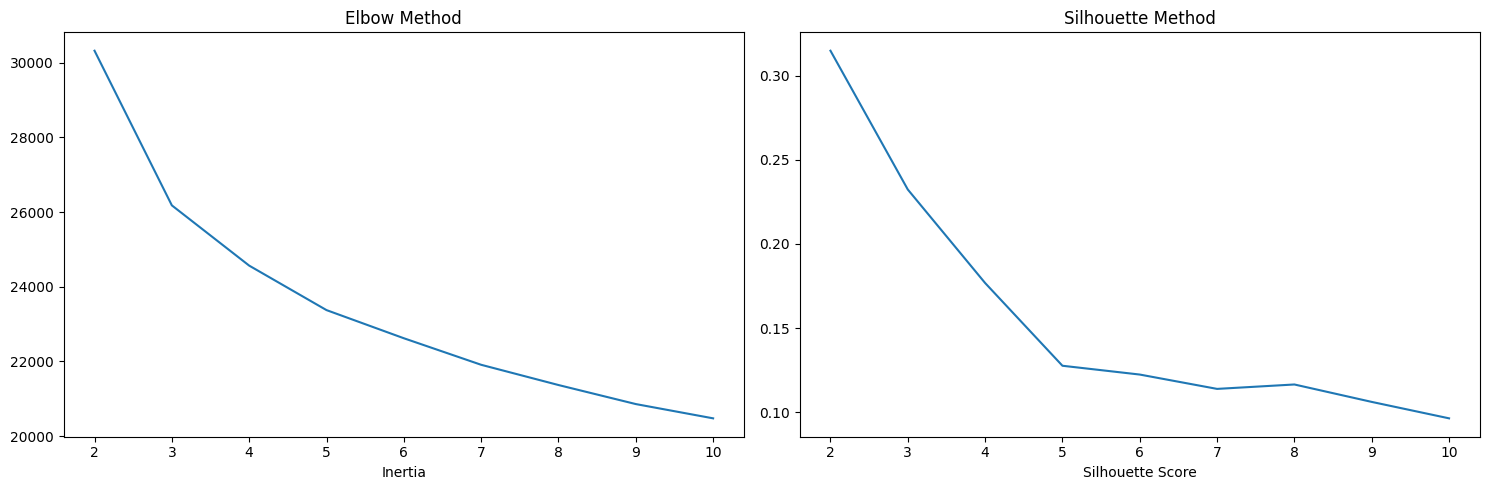

In [14]:
from auxiliar_functions import plot_elbow_silhouette
# Remove as linhas com NaN de forma definitiva
df_scaled = df_scaled.dropna()

# Agora chame sua função
plot_elbow_silhouette(df_scaled)


In [15]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [16]:
df = df.dropna()

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

RAMDON_STATE = 42

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("clustering",KMeans(n_clusters=3,random_state=RAMDON_STATE,n_init=10))
    ]
)



pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'Agegroup',
                                                   'HasChildren',
                                                   'HasAceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Response', 'Kidhome',
                                                   'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AceptedcmpTotal']),
                                                 ('standard', Stand...
                                                   'DaysSinceEnrolled']),
                                                 ('power', PowerTransformer(),
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProducts',
                                                   'NumTotalPurchases'])])),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [17]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2'], dtype=object)

In [18]:
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                  ['Education', 'Marital_Status', 'Agegroup',
                                   'HasChildren', 'HasAceptedCmp',
                                   'AcceptedCmp1', 'AcceptedCmp2',
                                   'AcceptedCmp3', 'AcceptedCmp4',
                                   'AcceptedCmp5', 'Complain', 'Response',
                                   'Kidhome', 'Teenhome', 'YearsSinceEnrolled',
                                   'Children', 'AceptedcmpTotal']),
                                 ('standard', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('minmax', MinMaxScaler(),
                                  ['Recency', 'DaysSinceEnrolled']),
                                 ('power', PowerTransformer(),
                                  ['MntWines', 'MntFruits', 'MntMeatProducts',
                              

In [19]:
pipeline["clustering"].labels_

array([0, 1, 0, ..., 0, 2, 1], dtype=int32)

In [20]:
df_clustered = df.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,Agegroup,MntTotal,MntRegularProducts,Children,HasChildren,AceptedcmpTotal,HasAceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [21]:
df_clustered["cluster"].value_counts().sort_index()

cluster
0    559
1    898
2    748
Name: count, dtype: int64

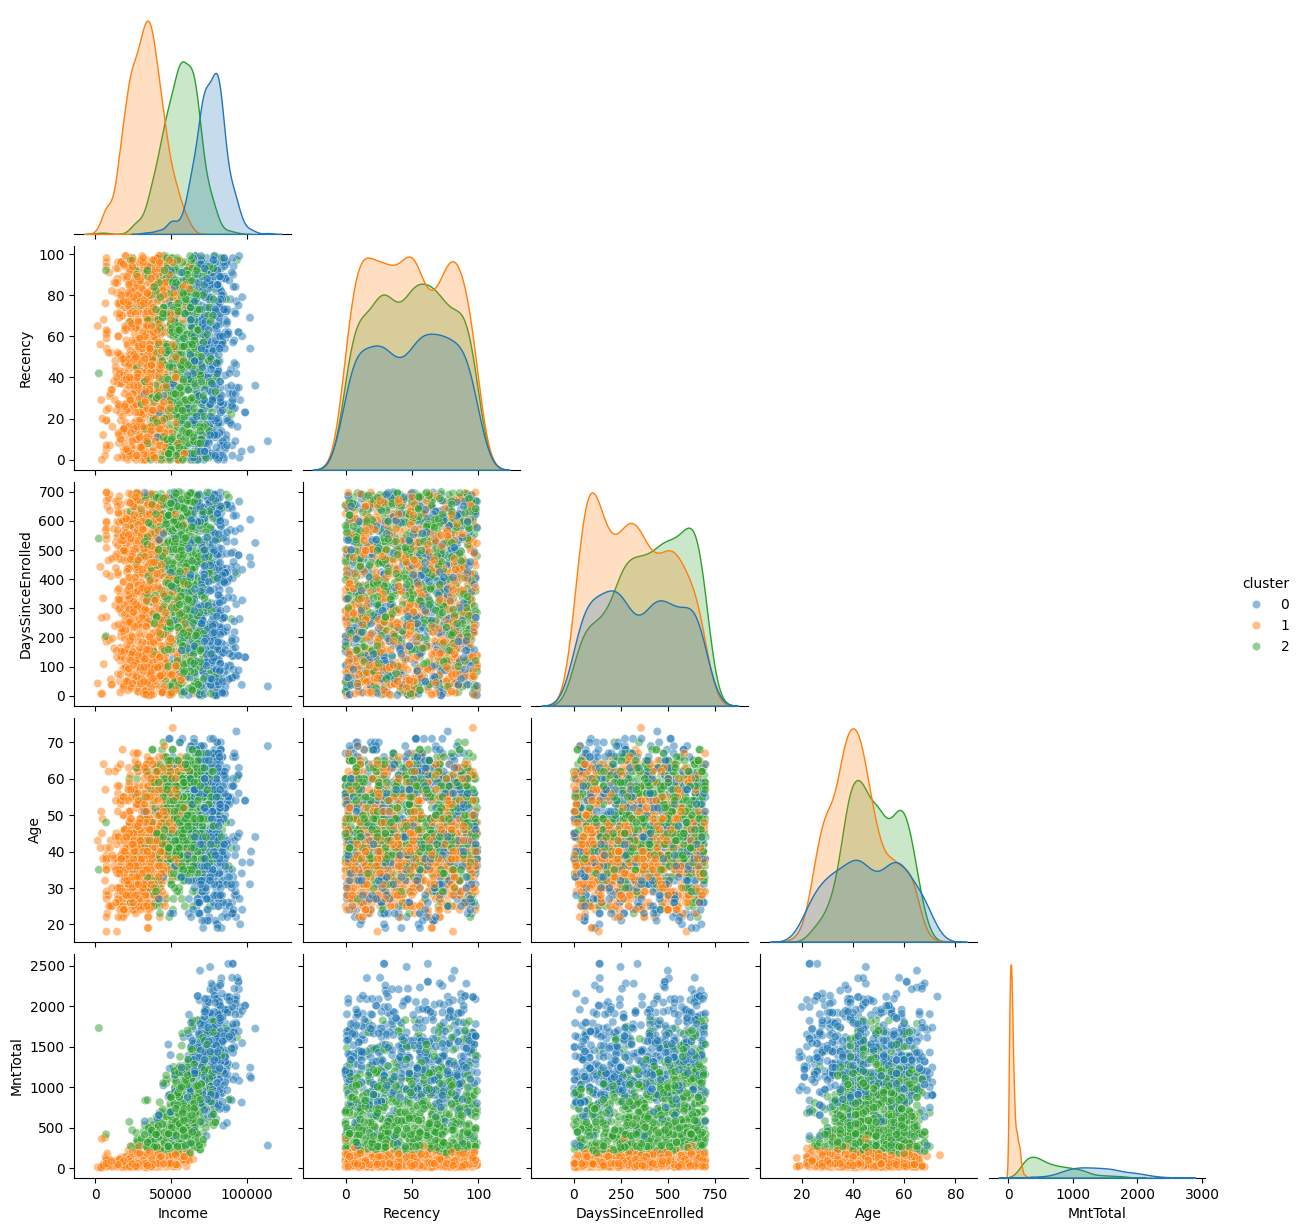

In [23]:
columns_analysis = [
    "Income",
    "Recency",
    "DaysSinceEnrolled",
    "Age",
    "MntTotal",
]

from auxiliar_functions import pairplot

pairplot(df_clustered, columns_analysis, hue_column="cluster")

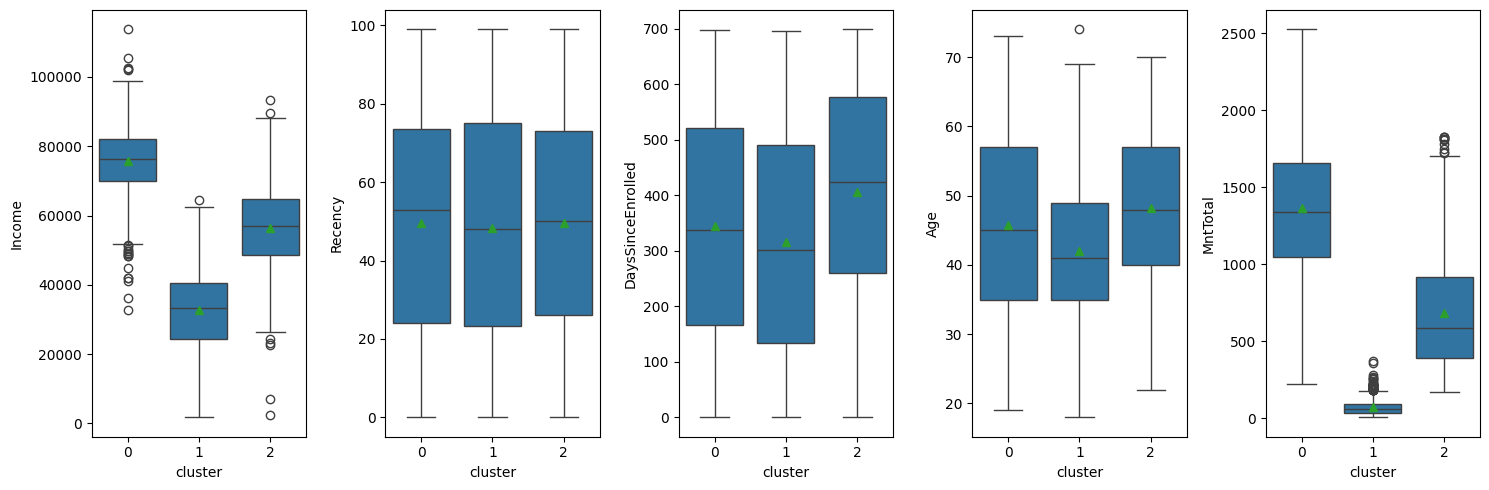

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), tight_layout=True)

for ax, col in zip(axs, columns_analysis):
    sns.boxplot(x="cluster", y=col, data=df_clustered, ax=ax, showmeans=True)

In [27]:
columns = [
    "HasChildren",
    "Marital_Status",
    "Education",
    "HasAceptedCmp",
    "Response",
    "YearsSinceEnrolled",
]

cluster_diff_cols = ["MntTotal", "Income"]

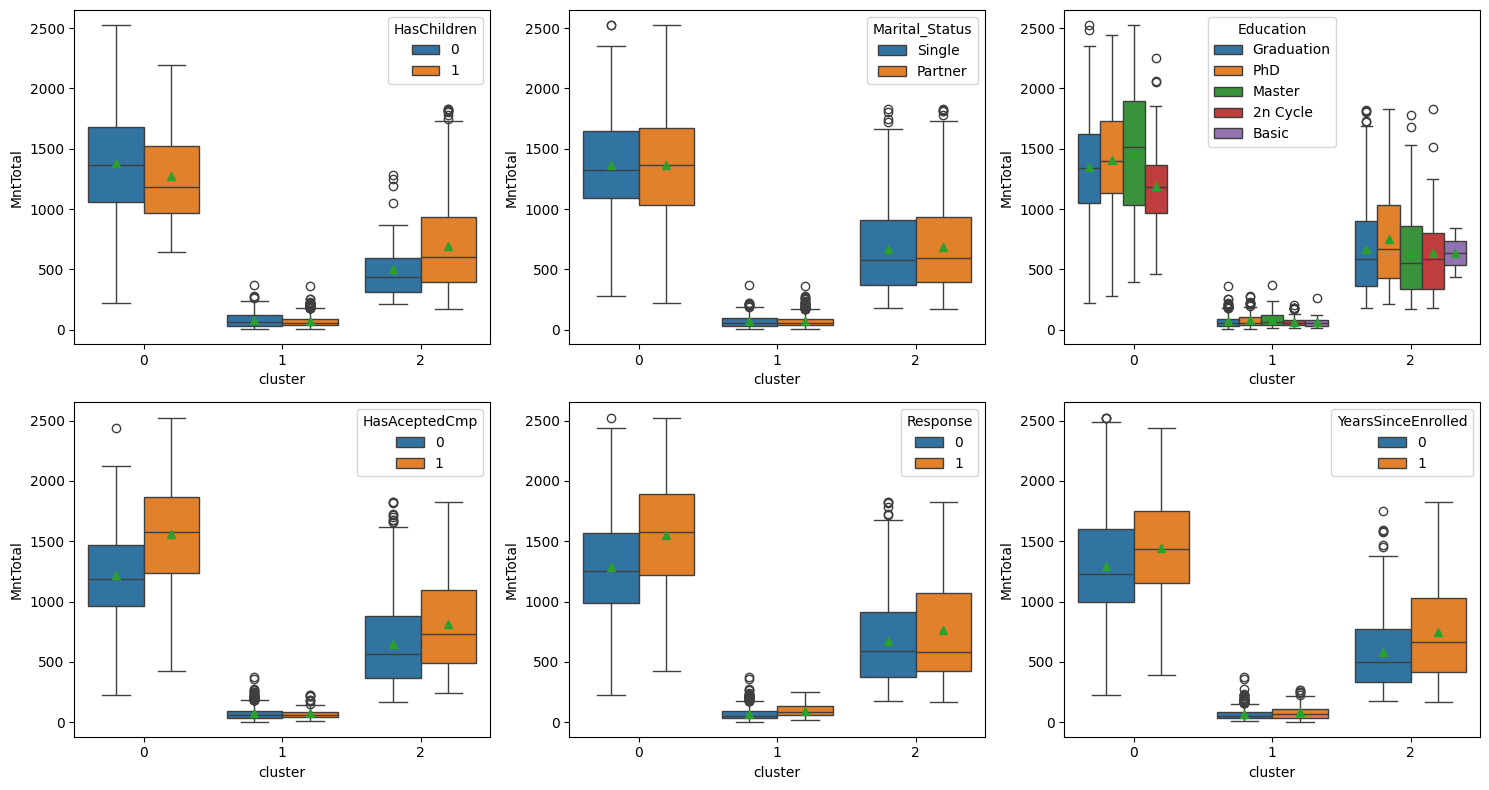

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), tight_layout=True)

for ax, col in zip(axs.flatten(), columns):
    sns.boxplot(
        x="cluster",
        y=cluster_diff_cols[0],
        data=df_clustered,
        ax=ax,
        showmeans=True,
        hue=col,
    )

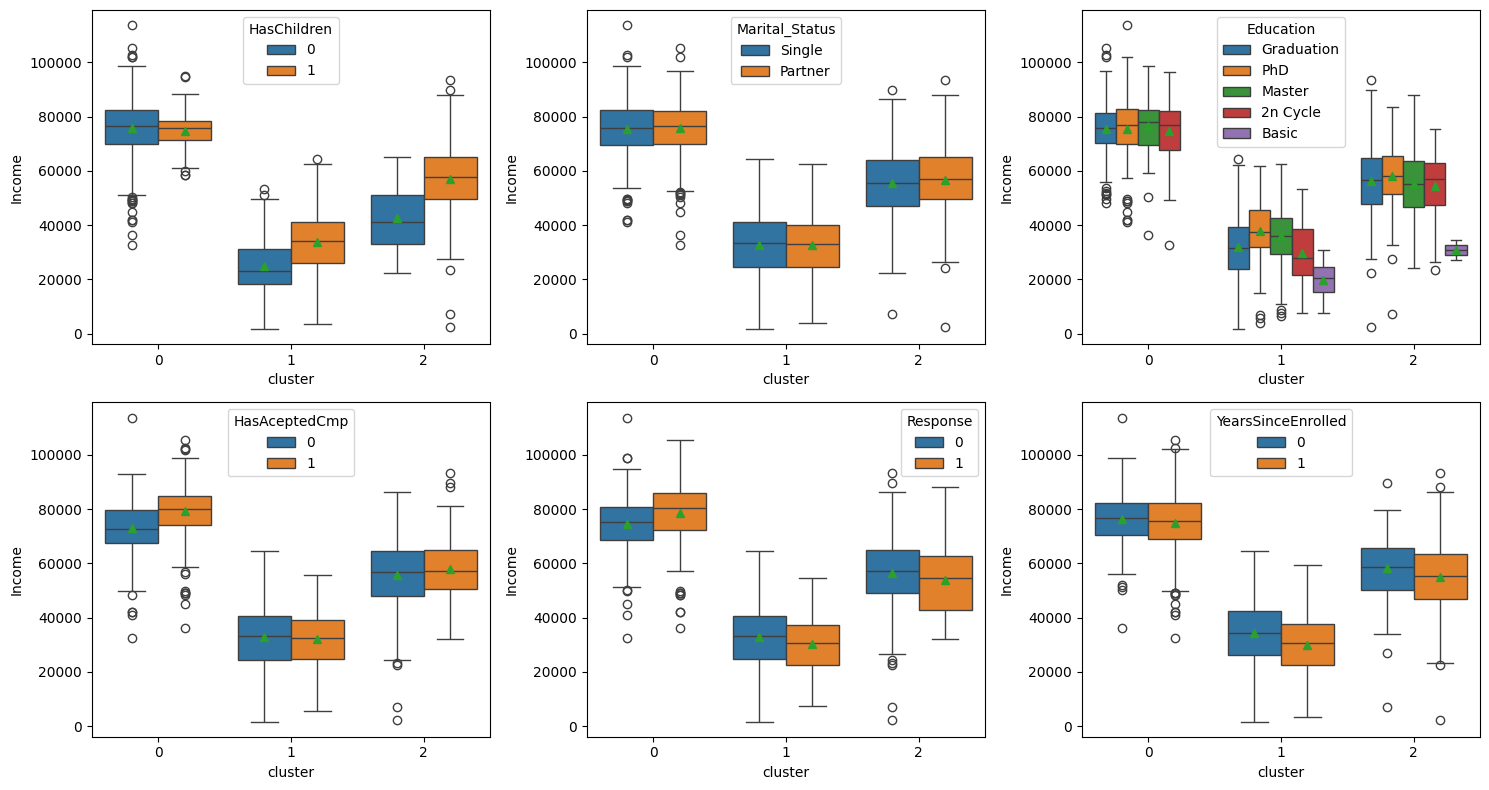

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), tight_layout=True)

for ax, col in zip(axs.flatten(), columns):
    sns.boxplot(
        x="cluster",
        y=cluster_diff_cols[1],
        data=df_clustered,
        ax=ax,
        showmeans=True,
        hue=col,
    )

In [30]:
df_clustered["cluster"].nunique()

3

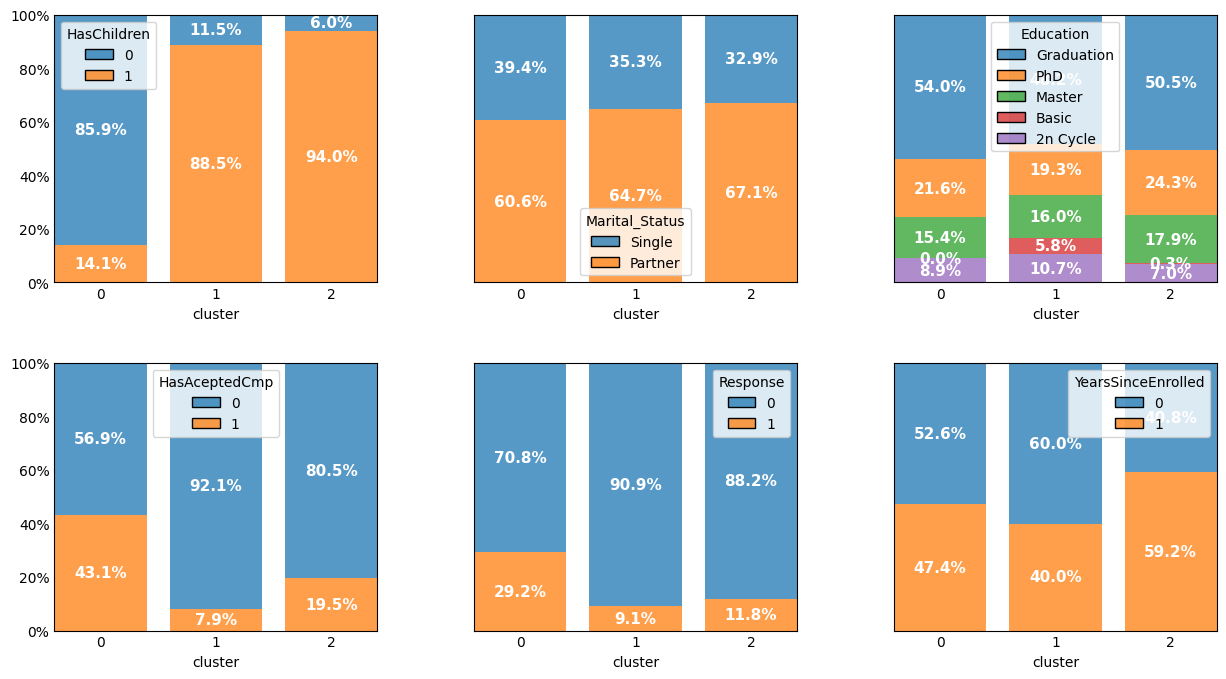

In [32]:
from auxiliar_functions import plot_columns_percent_by_cluster

plot_columns_percent_by_cluster(
    dataframe=df_clustered,
    columns=columns,
)

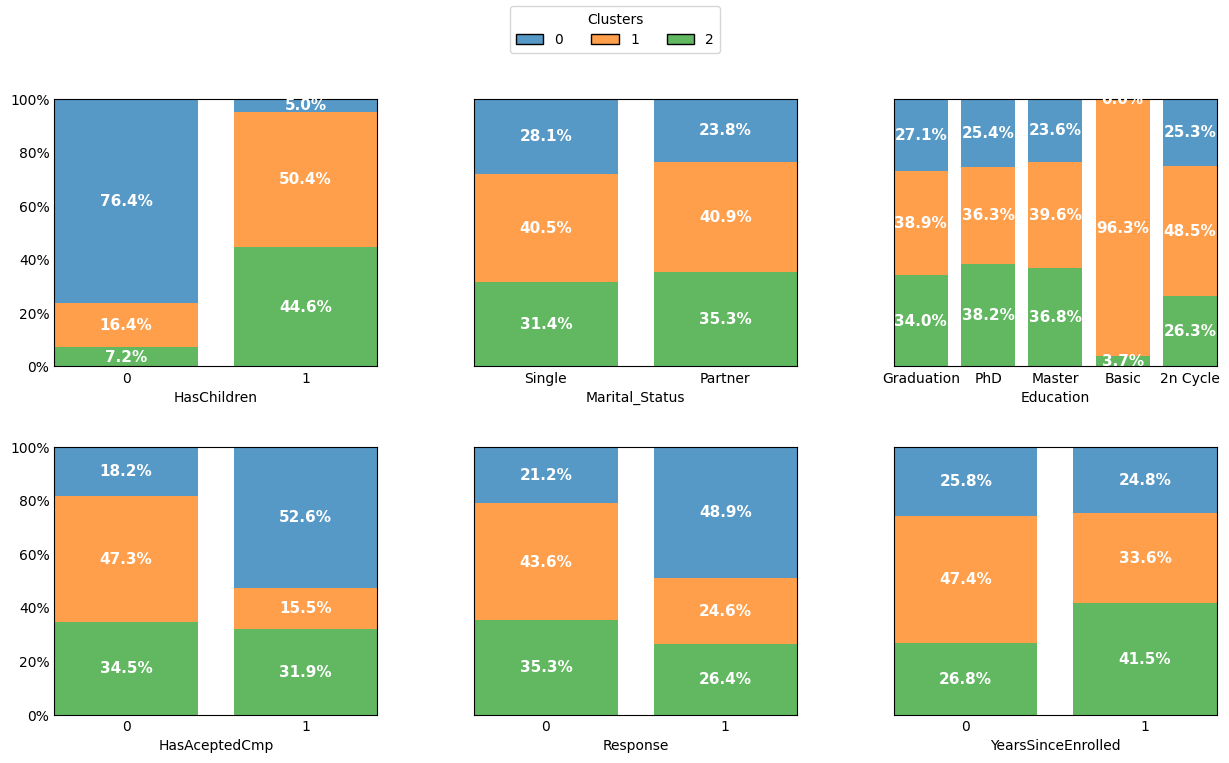

In [34]:
from auxiliar_functions import plot_columns_percent_hue_cluster

plot_columns_percent_hue_cluster(
    dataframe=df_clustered,
    columns=columns,
)

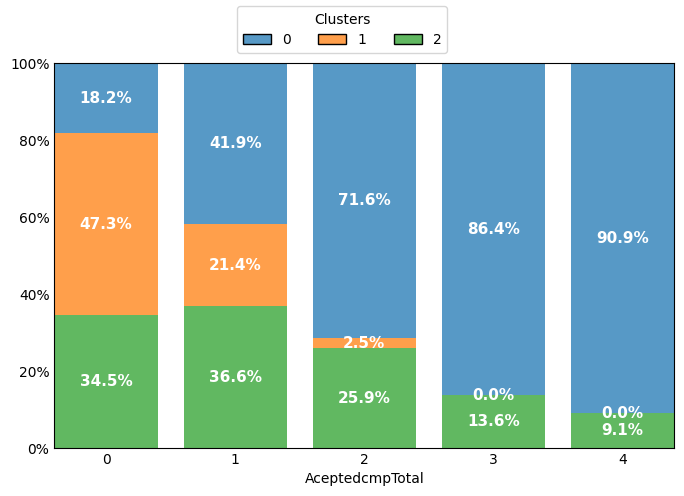

In [39]:


plot_columns_percent_hue_cluster(
    dataframe=df_clustered,
    columns=["AceptedcmpTotal"],
    rows_cols=(1, 1),
    figsize=(8, 5)
)

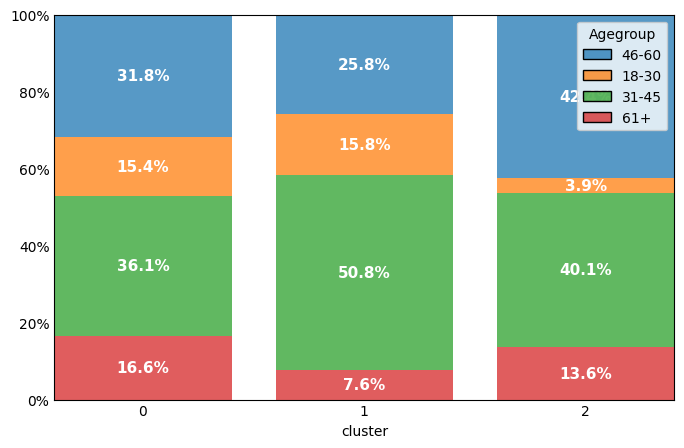

In [41]:
plot_columns_percent_by_cluster(
    dataframe=df_clustered,
    columns=["Agegroup"],
    rows_cols=(1, 1),
    figsize=(8, 5)
)

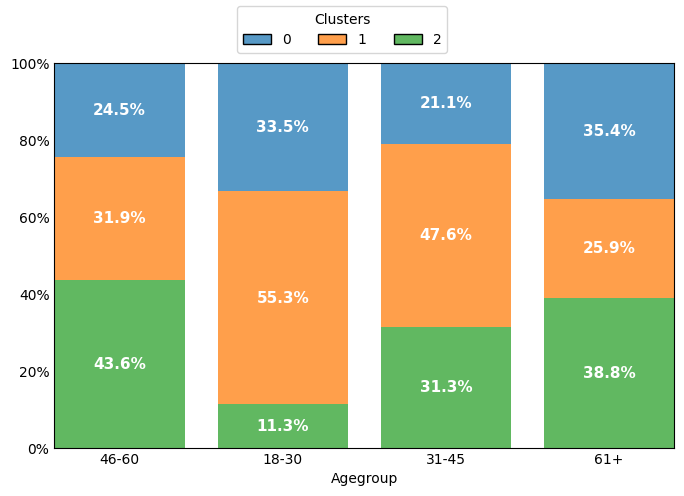

In [43]:
plot_columns_percent_hue_cluster(
    dataframe=df_clustered,
    columns=["Agegroup"],
    rows_cols=(1, 1),
    figsize=(8, 5)
)

Análise por cluster:

- Cluster 0: 
  - Renda alta 
  - gasto alto 
  - muito provalmente não tem filhos
  - mais propenso a aceitar campanhas
  - cluster sem pessoas com escolaridade básica
  - sem um perfil de idade que se destaque
  

- Cluster 1: 
  - Renda baixa 
  - gasto baixo 
  - provalmente tem filhos
  - baixa propensão a aceitar campanhas
  - único cluster com porcentagem significativa de pessoas com escolaridade básica
  - pessoas mais jovens
  

- Cluster 2: 
  - Renda intermediária
  - gasto intermediário
  - provalmente tem filhos
  - pode aceitar campanhas
  - pessoas com idade mais elevada
